<a href="https://colab.research.google.com/github/VoHuynhDuyThanh/AI/blob/main/Homework_week9/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

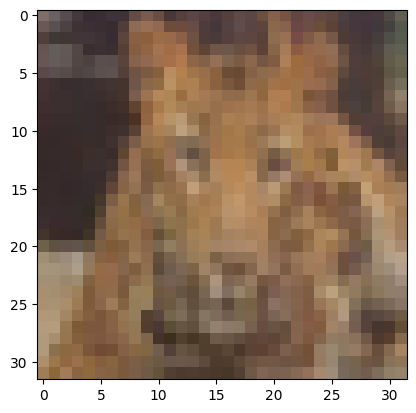

Con nay la [42]


In [63]:
from keras.datasets import cifar100
from keras.models import Sequential
import matplotlib.pyplot as plt

(x_trains, y_trains), (x_tests, y_tests ) = cifar100.load_data()

hinh = x_trains[5000]
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show()
print('Con nay la',y_trains[5000])

In [64]:
len(x_trains)

50000

In [65]:
x_tests.shape

(10000, 32, 32, 3)

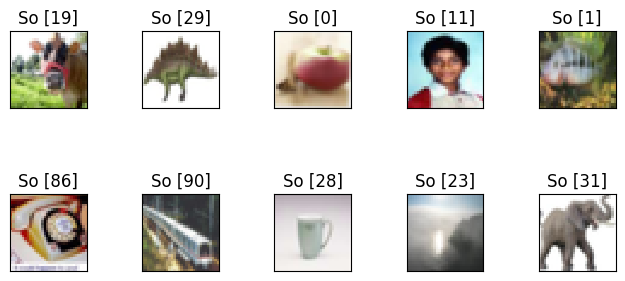

In [66]:
for i in range(10):
  plt.subplot(3, 5, i+1)
  plt.tight_layout()
  plt.imshow(x_trains[i], cmap = 'gray', interpolation = 'none')
  plt.title('So {}'.format(y_trains[i]))
  plt.xticks([])
  plt.yticks([])

In [67]:
from keras.layers import Dense
model = Sequential()
model.add(Dense(512,input_shape = (32*32*3,), activation='relu', name="Layer_1"))
model.add(Dense(256,input_shape = (32*32*3,), activation='relu', name="Layer_2"))
model.add(Dense(128,input_shape = (32*32*3,), activation='relu', name="Layer_3"))
model.add(Dense(64,input_shape = (32*32*3,), activation='relu', name="Layer_4"))
model.add(Dense(32,input_shape = (32*32*3,), activation='relu', name="Layer_5"))
model.add(Dense(100,activation='softmax', name = "Output_layer"))
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               1573376   
                                                                 
 Layer_2 (Dense)             (None, 256)               131328    
                                                                 
 Layer_3 (Dense)             (None, 128)               32896     
                                                                 
 Layer_4 (Dense)             (None, 64)                8256      
                                                                 
 Layer_5 (Dense)             (None, 32)                2080      
                                                                 
 Output_layer (Dense)        (None, 100)               3300      
                                                                 
Total params: 1,751,236
Trainable params: 1,751,236
No

In [68]:
x_trains = x_trains.reshape((50000, 32*32*3))
x_train = x_trains.astype('float32')/255 
x_tests = x_tests.reshape((10000, 32*32*3))
x_test = x_tests.astype('float32')/255

In [69]:
from keras.utils import to_categorical
y_train = to_categorical(y_trains, 100)
y_test = to_categorical(y_tests, 100)

In [70]:
#Bien dich
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size = 128)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_accunacy:', test_acc)
print('test_loss:', test_loss)

Epoch 1/10
391/391 [==============================] - 14s 32ms/step - loss: 4.3847 - accuracy: 0.0348
Epoch 2/10
391/391 [==============================] - 12s 31ms/step - loss: 4.0584 - accuracy: 0.0731
Epoch 3/10
391/391 [==============================] - 12s 32ms/step - loss: 3.9016 - accuracy: 0.1003
Epoch 4/10
391/391 [==============================] - 12s 32ms/step - loss: 3.7677 - accuracy: 0.1246
Epoch 5/10
391/391 [==============================] - 13s 32ms/step - loss: 3.6671 - accuracy: 0.1428
Epoch 6/10
391/391 [==============================] - 17s 44ms/step - loss: 3.5844 - accuracy: 0.1547
Epoch 7/10
391/391 [==============================] - 13s 32ms/step - loss: 3.5127 - accuracy: 0.1671
Epoch 8/10
391/391 [==============================] - 12s 32ms/step - loss: 3.4509 - accuracy: 0.1807
Epoch 9/10
391/391 [==============================] - 12s 32ms/step - loss: 3.3954 - accuracy: 0.1883
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - loss: 3.5118 

1/1 [==============================] - 0s 79ms/step


array([0])

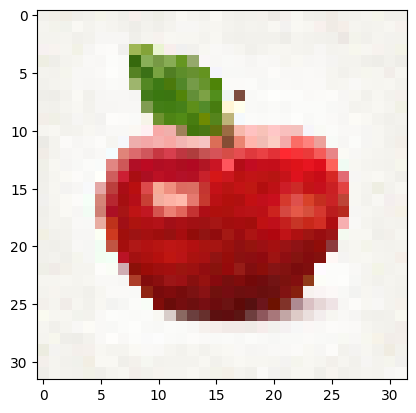

In [71]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

img = load_img('apple.jpeg', target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 32*32*3)
img = img.astype('float32')
img = img / 255
np.argmax(model.predict(img),axis = -1)

1/1 [==============================] - 0s 35ms/step


array([69])

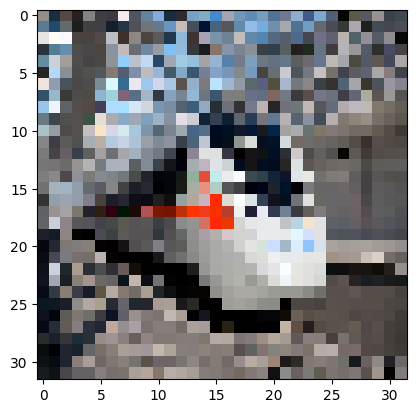

In [73]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

img = load_img('train.jpeg', target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 32*32*3)
img = img.astype('float32')
img = img / 255
np.argmax(model.predict(img),axis = -1)